In [54]:
#Impporting the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [55]:
#Fetching the dataset 
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv"
dataset= pd.read_csv(url)
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [56]:
#Describing the dataset
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [57]:
#Replacing the character with float
dataset.replace({'doornumber':{'two':2,'four':4}},inplace=True)
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


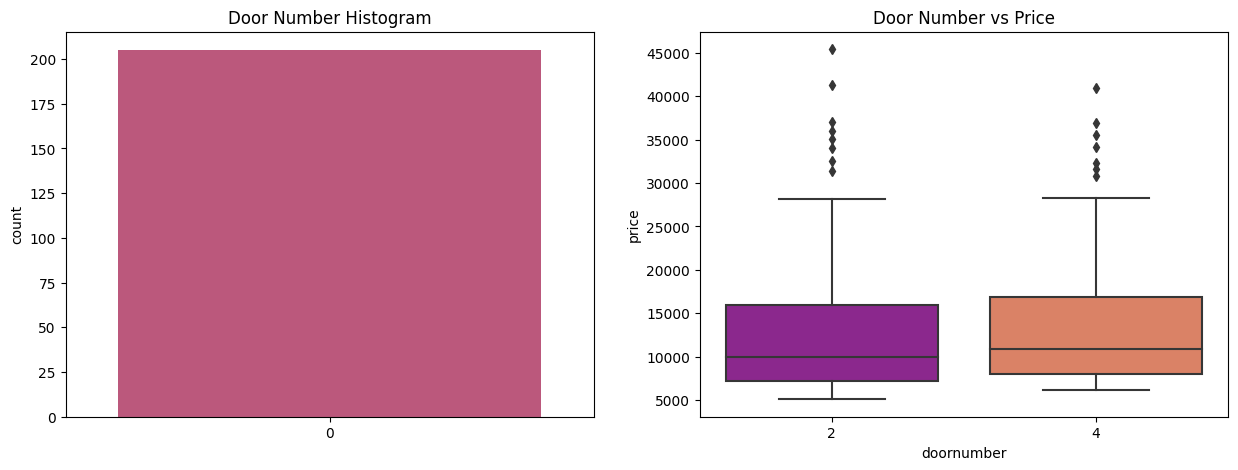

In [58]:
#Visualizing dataset using Histogram
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(dataset.doornumber,palette=("plasma"))
plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=dataset.doornumber,y=dataset.price,palette=("plasma"))
plt.show()

In [59]:
#Replacing the character with float
dataset.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,0,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,0,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,0,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,0,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,0,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,0,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,1,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,0,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,1,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


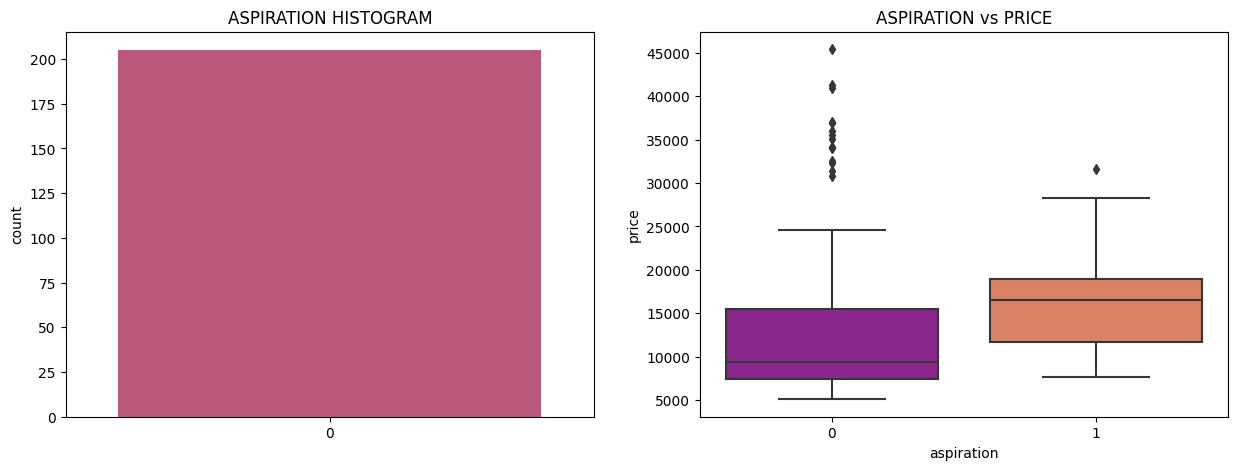

In [60]:
#Visualizing dataset using Histogram
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('ASPIRATION HISTOGRAM')
sns.countplot(dataset.aspiration,palette=('plasma'))
plt.subplot(1,2,2)
plt.title('ASPIRATION vs PRICE')
sns.boxplot(x=dataset.aspiration,y=dataset.price,palette=("plasma"))
plt.show()

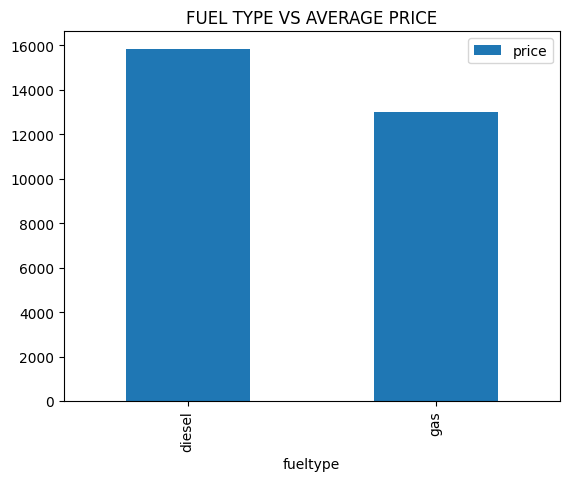

In [61]:
df=pd.DataFrame(dataset.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('FUEL TYPE VS AVERAGE PRICE')
plt.show()

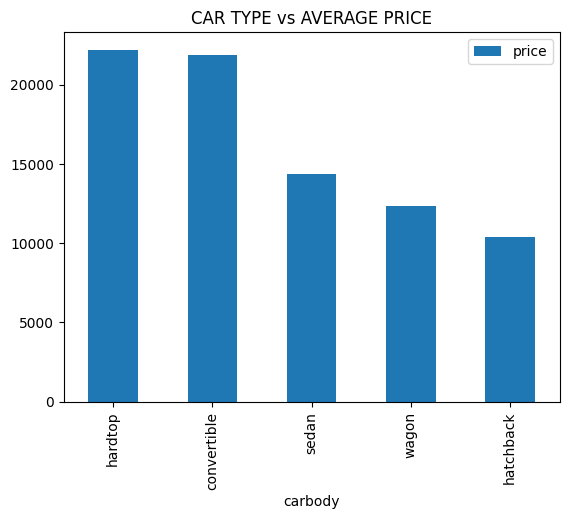

In [62]:
df=pd.DataFrame(dataset.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('CAR TYPE vs AVERAGE PRICE')
plt.show()

In [63]:
data=dataset[["symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]]
x=np.array(dataset.drop([predict],1))
y=np.array(dataset[predict])
print(x)
print('-------------------------------------------------------------------------------------------')
print(y)

[[1 3 'alfa-romero giulia' ... 5000 21 27]
 [2 3 'alfa-romero stelvio' ... 5000 21 27]
 [3 1 'alfa-romero Quadrifoglio' ... 5000 19 26]
 ...
 [203 -1 'volvo 244dl' ... 5500 18 23]
 [204 -1 'volvo 246' ... 4800 26 27]
 [205 -1 'volvo 264gl' ... 5400 19 25]]
-------------------------------------------------------------------------------------------
[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    13645.    15645.     8845.     8495.    10595.    10245.
 10795.    11245.    18280.    18344.  

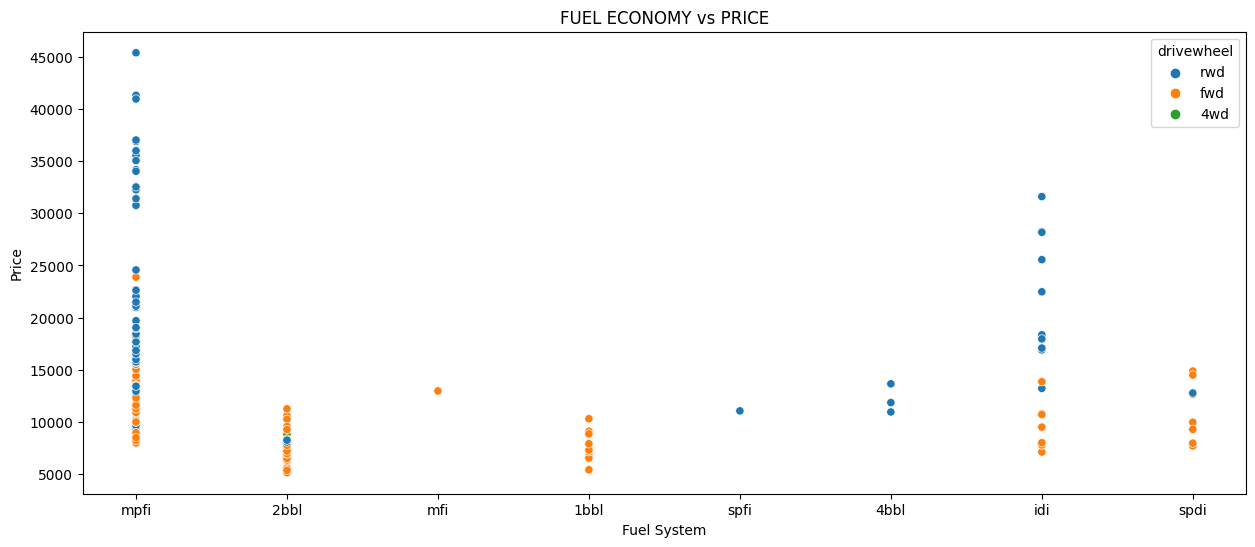

In [64]:
plt.figure(figsize=(15,6))
plt.title('FUEL ECONOMY vs PRICE')
sns.scatterplot(dataset,x='fuelsystem',y='price',hue='drivewheel')
plt.xlabel('Fuel System')
plt.ylabel('Price')
plt.show()